In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import string

In [18]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

### [scatterplot label]

In [6]:
iris_dataset = datasets.load_iris()

In [7]:
X = iris_dataset.data

1) 방안1

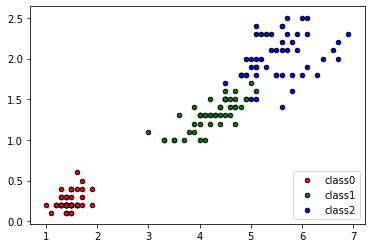

In [9]:
mask0 = iris_dataset.target == 0
mask1 = iris_dataset.target == 1
mask2 = iris_dataset.target == 2

plt.scatter(X[mask0,2], X[mask0,3], edgecolor = 'k', s=20, c = 'r', label = 'class0')
plt.scatter(X[mask1,2], X[mask1,3], edgecolor = 'k', s=20, c = 'g', label = 'class1')
plt.scatter(X[mask2,2], X[mask2,3], edgecolor = 'k', s=20, c = 'b', label = 'class2')

plt.legend(loc=4)
plt.show()

2) 방안2

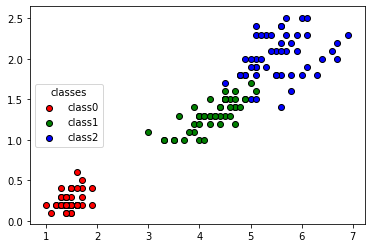

In [10]:
fig, ax = plt.subplots()
colors = ['r','g','b']
classes = [0,1,2]

for i, color in zip(classes, colors):
    mask = iris.target == i
    ax.scatter(X[mask,2], X[mask,3], edgecolor = 'k', 
               c = color, label = 'class{}'.format(i))
    ax.legend(loc = 'center left', title = 'classes')
    
plt.show()

3) 방안3
- *scatter.legend_elements() 사용

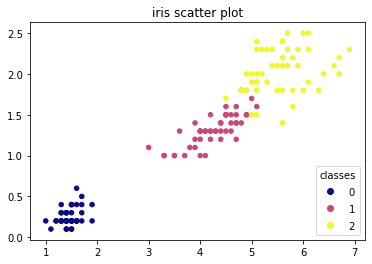

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,2], X[:,3], edgecolor = None, s=20, c = iris_dataset.target, cmap = 'plasma')

ax.legend(*scatter.legend_elements(), loc='lower right', title = 'classes')
ax.set_title('iris scatter plot')
plt.show()

### handling label : [cumulative distribution function]

In [14]:
# 데이터 생성

np.random.seed(100)
scores_arr = np.vstack([np.random.choice(range(30,81), 20, replace = True),
                      np.random.choice(range(20,91), 20, replace = True)])

scores_df = pd.DataFrame(scores_arr.T, columns = ['eng','math'])

name = [name for name in string.ascii_uppercase[:20]]

scores_df['name'] = name
scores_df = scores_df[['name','eng','math']]

In [15]:
# 영어 누적상대도수
rel_freq, _ = np.histogram(scores_df['eng'], bins = 10, range = (0,100))
cum_rel_freq = np.cumsum(rel_freq) / sum(rel_freq)

In [16]:
# 수학 누적상대도수
rel_freq_math, _ = np.histogram(scores_df['math'], bins = 10, range = (0,100))
cum_rel_freq_math = np.cumsum(rel_freq_math) / sum(rel_freq_math)

**[양축 표현 시각화 및 레이블 핸들링]**

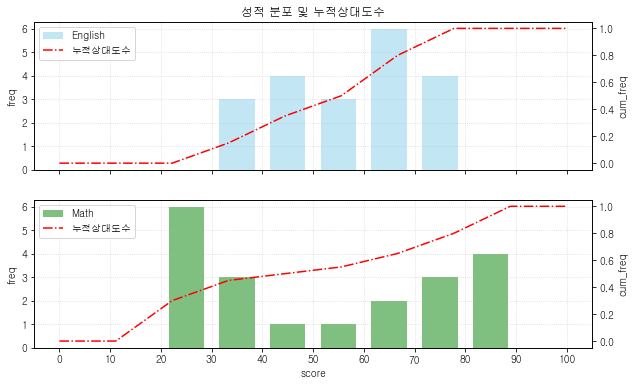

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True, sharey = True)

ax0_1 = ax[0].twinx()
ax1_1 = ax[1].twinx()

ax[0].hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue',
        alpha = 0.5, label = 'English')
ax[1].hist(scores_df['math'], bins = 10, range = (0,100), rwidth = 0.7, color = 'g',
        alpha = 0.5, label = 'Math')
ax0_1.plot(np.linspace(0,100,10), cum_rel_freq, color='red', ls='-.', label = '누적상대도수')
ax1_1.plot(np.linspace(0,100,10), cum_rel_freq_math, color='red', ls='-.',
          label = '누적상대도수')

ax[0].set_xticks(np.linspace(0,100,10+1))
ax[1].set_xlabel('score')
ax[0].set_ylabel('freq')
ax[1].set_ylabel('freq')
ax0_1.set_ylabel('cum_freq')
ax1_1.set_ylabel('cum_freq')
ax[0].grid(ls = ':', alpha = 0.5)
ax[1].grid(ls = ':', alpha = 0.5)
ax[0].set_title('성적 분포 및 누적상대도수')

# handling label : 2개의 레이블을 합쳐서 하나로 표현 가능
lines0, labels0 = ax[0].get_legend_handles_labels()
lines0_1, labels0_1 = ax0_1.get_legend_handles_labels()
lines1, labels1 = ax[1].get_legend_handles_labels()
lines1_1, labels1_1 = ax1_1.get_legend_handles_labels()

li0 = lines0 + lines0_1
la0 = labels0 + labels0_1
li1 = lines1 + lines1_1
la1 = labels1 + labels1_1


ax[0].legend(li0, la0, loc = 2)
ax[1].legend(li1, la1, loc = 2)

plt.show()

### tips data

In [21]:
tips = pd.read_csv('examples/tips.csv')

1) 1, 6인 제외

In [23]:
tips1 = tips.loc[~tips['size'].isin([1,6]),:]

In [24]:
a = tips1['tip'].groupby(tips['day']).sum()

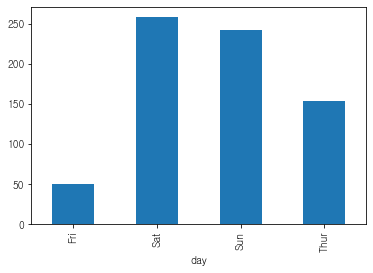

In [25]:
a.plot.bar()

요일순 재정렬

In [27]:
a1 = a[['Thur','Fri','Sat','Sun']]

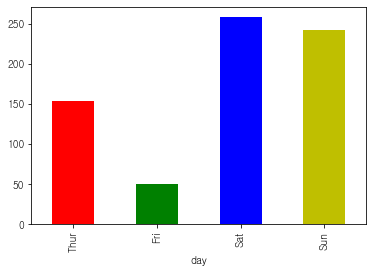

In [28]:
a1.plot.bar(color=['r','g','b','y'])

2) 5인도 제외(위 tips1으로부터)

In [29]:
tips2 = tips1.loc[~tips['size'].isin([5]),:]

In [31]:
tips2['size'].unique()

array([2, 3, 4], dtype=int64)

In [32]:
party_counts = pd.crosstab(tips2['day'],tips2['size'])

In [33]:
p_count = party_counts.loc[['Thur','Fri','Sat','Sun']]

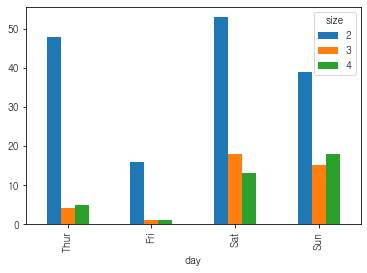

In [34]:
p_count.plot.bar()